In [1]:
import tensorflow as tf

from tensorflow import keras

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import utils
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import TensorBoard


###### training params

In [3]:

batch_size = 256
epochs = 8

pool_size = (2, 2)                    # size of poolin area for max pooling
prob_drop_conv = 0.25                  # drop probability for dropout @ conv layer
prob_drop_hidden = 0.5                # drop probability for dropout @ fc layer

## data params

In [4]:
# Create dictionary of target classes
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

# data params
nb_classes = len(label_dict)

## Load MNIST dataset

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [6]:
(X_train_raw, Y_train_raw), (X_test_raw, Y_test_raw) = fashion_mnist.load_data()
print('X_train_raw original shape:', X_train_raw.shape)

X_train_raw original shape: (60000, 28, 28)


### Reshape Data from image matrix to array & normalize


In [7]:

# TensorFlow
X_train = X_train_raw.reshape(X_train_raw.shape[0], X_train_raw.shape[1], X_train_raw.shape[2], 1).astype('float32')
X_train /= 255.

X_test = X_test_raw.reshape(X_test_raw.shape[0], X_test_raw.shape[1], X_test_raw.shape[2], 1).astype('float32')
X_test /= 255.

input_shape = (X_train_raw.shape[1], X_train_raw.shape[2], 1)
    
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('input_shape: ', input_shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)
input_shape:  (28, 28, 1)


In [8]:
Y_train = utils.to_categorical(Y_train_raw)

Y_test = utils.to_categorical(Y_test_raw)

## Convolutional Network model

In [9]:
model = Sequential()

# input layer
model.add(InputLayer(input_shape=input_shape))

# batch normalization
model.add(BatchNormalization())

# conv1 layer
model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2), padding='same'))
model.add(Dropout(prob_drop_conv))

# conv2 layer
model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2), padding='same'))
model.add(Dropout(prob_drop_conv))

# conv3 layer
model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(prob_drop_conv))

# fc1 layer
# why is it 625 here??
model.add(Dense(units=250, kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(Dropout(prob_drop_hidden))

# fc2 layer
model.add(Dense(units=10, kernel_initializer='random_normal'))
model.add(Activation('softmax'))
          
model.compile(optimizer=RMSprop(lr=0.001, rho=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_v2 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0

## Train

In [10]:
import time
timestamp = time.strftime("%Y%m%d-%H%M%S")
log_dir = '~/tensorboard_logs/tutorial/fashion_minist/' + timestamp
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)

In [11]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, shuffle=True, validation_split=0.20, verbose=1, callbacks=[tensorboard_callback])

Train on 48000 samples, validate on 12000 samples
Epoch 1/8
  256/48000 [..............................] - ETA: 48:19 - loss: 2.4376 - accuracy: 0.0586

W0601 12:47:55.706106 140603103323904 callbacks.py:236] Method (on_train_batch_end) is slow compared to the batch update (0.249826). Check your callbacks.


48000/48000 [==============================] - 22s 466us/sample - loss: 0.7951 - accuracy: 0.7044 - val_loss: 0.5707 - val_accuracy: 0.8382
Epoch 2/8
48000/48000 [==============================] - 6s 134us/sample - loss: 0.4589 - accuracy: 0.8302 - val_loss: 0.3833 - val_accuracy: 0.8662
Epoch 3/8
48000/48000 [==============================] - 6s 134us/sample - loss: 0.3842 - accuracy: 0.8600 - val_loss: 0.3113 - val_accuracy: 0.8846
Epoch 4/8
48000/48000 [==============================] - 6s 134us/sample - loss: 0.3435 - accuracy: 0.8744 - val_loss: 0.2945 - val_accuracy: 0.8916
Epoch 5/8
48000/48000 [==============================] - 6s 134us/sample - loss: 0.3166 - accuracy: 0.8859 - val_loss: 0.2766 - val_accuracy: 0.8942
Epoch 6/8
48000/48000 [==============================] - 6s 134us/sample - loss: 0.2977 - accuracy: 0.8918 - val_loss: 0.2595 - val_accuracy: 0.9043
Epoch 7/8
48000/48000 [==============================] - 6s 134us/sample - loss: 0.2868 - accuracy: 0.8950 - val_lo

In [12]:
history.history

{'loss': [0.7950859599113465,
  0.4589456451733907,
  0.3841986948649089,
  0.3434811073144277,
  0.3166010359128316,
  0.29770367713769275,
  0.28678180543581644,
  0.2755637148221334],
 'accuracy': [0.704375,
  0.8301875,
  0.8600417,
  0.87439585,
  0.885875,
  0.8918333,
  0.89504164,
  0.9000625],
 'val_loss': [0.570663935025533,
  0.38331205876668295,
  0.31127371939023335,
  0.294512322028478,
  0.27663379939397176,
  0.259479655623436,
  0.26754416306813555,
  0.24357622178395588],
 'val_accuracy': [0.83816665,
  0.86625,
  0.88458335,
  0.8915833,
  0.89425,
  0.90433335,
  0.89925,
  0.91216666]}

## Evaluate

In [13]:
evaluation = model.evaluate(X_test, Y_test, batch_size=2*batch_size, verbose=1)
print('Summary: Loss over the test dataset: %.4f, Accuracy: %.4f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 0s 46us/sample - loss: 0.2641 - accuracy: 0.9066
Summary: Loss over the test dataset: 0.2641, Accuracy: 0.9066


## Predict

In [14]:
test_predictions = model.predict(X_test)
test_prediction_ids = test_predictions.argmax(axis=1)

## Plot some predictions

In [16]:
from matplotlib import pyplot as plt
import numpy as np
def plots(ims, figsize=(12,1), dpi=150, rows=1, interp=False, titles=None):
    f = plt.figure(figsize=figsize, dpi=dpi)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=8)
        plt.imshow(ims[i], interpolation=None if interp else 'none', cmap='gray')

In [17]:
n_view = 10

idx = np.random.permutation(range(0,len(X_test)))[:n_view]

imgs = X_test[idx,:].reshape(n_view, X_train_raw.shape[1], X_train_raw.shape[2])
titles = [label_dict.get(key) for key in test_prediction_ids[idx]]

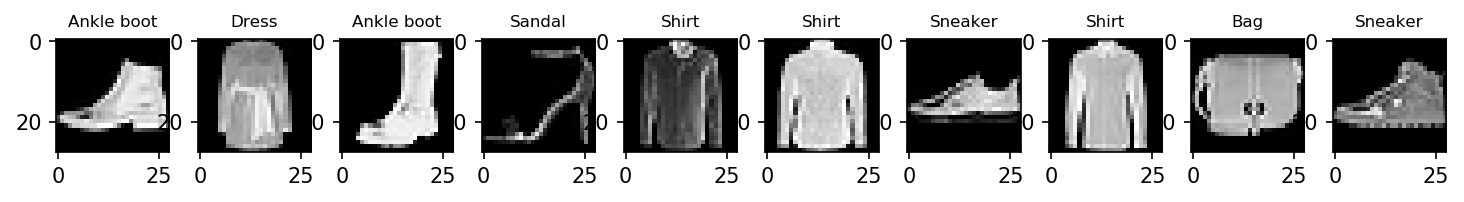

In [18]:
plots(imgs, titles=titles)
plt.show()

## Examine wrong predictions


In [19]:
# convert category vector into category label
Y_test_ids = Y_test.argmax(axis=1)

# compare the predicted and actual category labels to find error predictions
errors = np.array(Y_test_ids) - np.array(test_prediction_ids)

# gather all the wrong prediction indices
errors_idx = np.nonzero(errors)[0]

In [20]:
n_view = 10

random_idx = np.random.permutation(range(0,len(errors_idx)))[:n_view]

# grab a sampling of error indices 
random_errors_idx = errors_idx[random_idx]

# and prepare their images and labels
imgs = X_test[random_errors_idx,:].reshape(n_view, X_test_raw.shape[1], X_test_raw.shape[2])

# convert category_id to label string
prediction_titles = [label_dict.get(category_id) for category_id in test_prediction_ids[random_errors_idx]]
correct_titles = [label_dict.get(category_id) for category_id in Y_test_ids[random_errors_idx]]

# construct title string as "predicted>actual"
title_tuples = zip(prediction_titles, correct_titles)
titles = ['>'.join(t) for t in title_tuples]

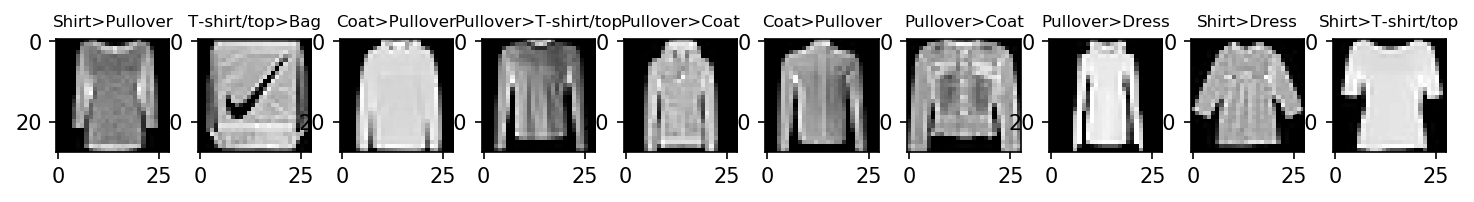

In [21]:
plots(imgs, titles=titles)
plt.show()

In [22]:
len(errors_idx) / 10000.


0.0934